<a href="https://colab.research.google.com/github/jfcepeda97/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/blob/master/CNN_PREDICCI%C3%93N_DESLIZAMIENTOS_Proyecto_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTAR LIBRERÍAS

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import os
import os.path
from pathlib import Path
import torch
from mlxtend.plotting import plot_confusion_matrix
from typing import List

import shutil 
from shutil import rmtree

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
#Clonar repositorio de Github
! git clone 'https://github.com/jfcepeda97/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo.git'

Cloning into 'DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo'...
remote: Enumerating objects: 802517, done.
remote: Counting objects: 100% (802517/802517), done.
remote: Compressing objects: 100% (2223/2223), done.
remote: Total 802517 (delta 801981), reused 800778 (delta 800289), pack-reused 0
Receiving objects: 100% (802517/802517), 101.38 MiB | 19.42 MiB/s, done.
Resolving deltas: 100% (801981/801981), done.
Checking out files: 100% (828993/828993), done.


In [ ]:
#Eliminar carpeta Github
rmtree("DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo")

#INICIALIZACIÓN DE TENSOR VACÍO (131,5,5,14)

In [ ]:
#Generación de tensores para almacenamiento de datos de entrada
inputs= np.empty((262, 5, 5, 19), dtype='float32')
bag= np.empty((262, 5, 5, 19), dtype='float32')

#Generación de tensores para almacenamiento de datos de salida
outputs = np.empty((262,1), dtype='float32')
print(inputs.shape)
print(outputs.shape)

(262, 5, 5, 19)
(262, 1)


#CARGA DE DATA Y STACKING DE IMÁGENES (14 VARIABLES)

In [ ]:
from typing import List
Dataset = r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/DATASET' # Dirección general del DATASET
List_of_possibilities = os.listdir(Dataset) # Si deslizamiento / No deslizamiento
List_of_possibilities = sorted(List_of_possibilities)  #Organizar en orden alfabético 
add = 0    
local = 0  

for your_possibilities_name in List_of_possibilities: # Accede a las carpetas del DATASET
  p=os.path.join(Dataset,your_possibilities_name)
  Folder = p
  List_of_folder = os.listdir(Folder)
  List_of_folder = sorted(List_of_folder)  #Organizar en orden alfabético 
  local = local+1

  for your_folder_name in List_of_folder: # Accede a las subcarpetas (cada deslizamiento) del DATASET
    a=os.path.join(Folder,your_folder_name)
    b=(str(a))
    Carpeta = b

    add = add+1

    List_of_files = os.listdir(Carpeta)
    List_of_files = sorted(List_of_files)  #Organizar en orden alfabético 

    sum=0
    for i in [1]:  # Para que las matrices sean definadas antes de ser apiladas
      for your_file_name in List_of_files: #Para acceder a cada imagen del DATASET
        c=os.path.join(Carpeta,your_file_name)
        d=(str(c))

        Archivo = d
        #print(Archivo)

        sum=sum+1
        #print(sum)
        if sum == 1:
          v1 = Image.open(Archivo)
          v1array = np.array(v1)
        elif sum == 2:
          v2 = Image.open(Archivo)
          v2array = np.array(v2)
        elif sum == 3:
          v3 = Image.open(Archivo)
          v3array = np.array(v3)
        elif sum == 4:
          v4 = Image.open(Archivo)
          v4array = np.array(v4)
        elif sum == 5:
          v5 = Image.open(Archivo)
          v5array = np.array(v5)
        elif sum == 6:
          v6 = Image.open(Archivo)
          v6array = np.array(v6)
        elif sum == 7:
          v7 = Image.open(Archivo)
          v7array = np.array(v7)
          v7array = np.clip(v7array, 0, 1)
        elif sum == 8:
          v8 = Image.open(Archivo)
          v8array = np.array(v8)
          v8array = np.clip(v8array, 0, 1)
        elif sum ==9:
          v9 = Image.open(Archivo)
          v9array = np.array(v9)
          v9array = np.clip(v9array, 0, 1)
        elif sum == 10:
          v10 = Image.open(Archivo)
          v10array = np.array(v10)
          v10array = np.clip(v10array, 0, 1)
        elif sum == 11:
          v11 = Image.open(Archivo)
          v11array = np.array(v11)
        elif sum == 12:
          v12 = Image.open(Archivo)
          v12array = np.array(v12)
        elif sum == 13:
          v13 = Image.open(Archivo)
          v13array = np.array(v13)
        elif sum == 14:
          v14 = Image.open(Archivo)
          v14array = np.array(v14)
        elif sum == 15:
          v15 = Image.open(Archivo)
          v15array = np.array(v15)
        elif sum ==16:
          v16 = Image.open(Archivo)
          v16array = np.array(v16)
        elif sum == 17:
          v17 = Image.open(Archivo)
          v17array = np.array(v17)
          v17array = np.clip(v17array, 0, 1)
        elif sum == 18:
          v18 = Image.open(Archivo)
          v18array = np.array(v18)
          v18array = np.clip(v18array, 0, 1)
        elif sum == 19:
          v19 = Image.open(Archivo)
          v19array = np.array(v19)
          v19array = np.clip(v19array, 0, 1)
          
      #Stacking de las 19 variables
      img = np.dstack((v1array, v2array, v3array, v4array, v5array, v6array, v7array, v8array, v9array, v10array, v11array, v12array, v13array, v14array, v15array, v16array, v17array, v18array, v19array))
      img = img.reshape((1,5,5,19))
      
      #Guardado en el tensor de entrada
      inputs[add-1] = img

  #Asignación de resultados de las entradas
  if local==1:
    outputs[0:130]=0
  elif local==2:
    outputs[131:]=1

outputs = np.round(outputs)
print (inputs.shape)
print (outputs.shape)
print('----------------------')
print (outputs[:5])
print (outputs[131:136])

(262, 5, 5, 19)
(262, 1)
----------------------
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
#Verificación de entradas para variables cualitativas (Vegetación)
print('Vegetación 1')
print(v17array)
print('Vegetación 2')
print(v18array)
print('Vegetación 3')
print(v19array)

Vegetación 1
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Vegetación 2
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Vegetación 3
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


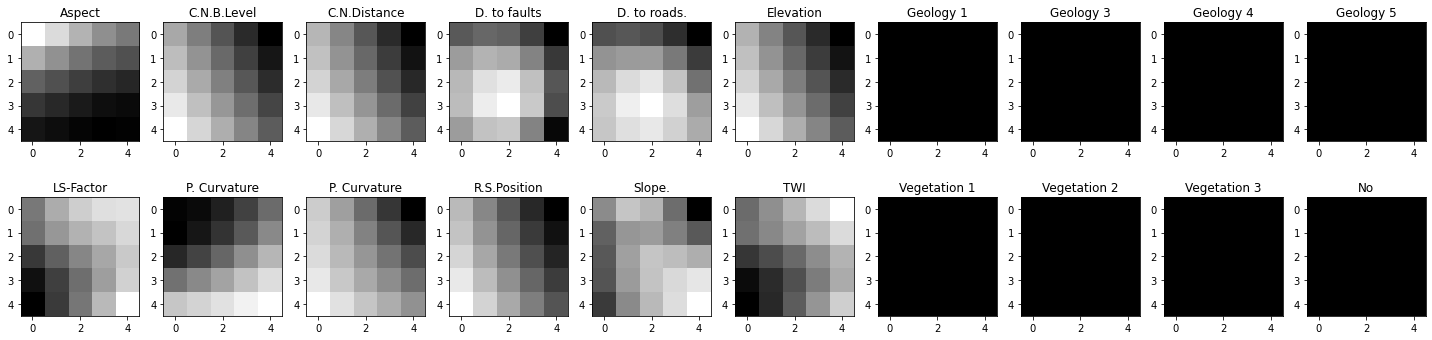

In [ ]:
fig, ax = plt.subplots(2,10,figsize=(20,5))

q=260 #Posición dentro de los inputs, Carpeta_0 No Deslizamientos
ax[0,0].imshow(inputs[q,:,:,0], cmap='gray')
ax[0,0].set_title('Aspect')
ax[0,1].imshow(inputs[q,:,:,1], cmap='gray')
ax[0,1].set_title('C.N.B.Level')
ax[0,2].imshow(inputs[q,:,:,2], cmap='gray')
ax[0,2].set_title('C.N.Distance')
ax[0,3].imshow(inputs[q,:,:,3], cmap='gray')
ax[0,3].set_title('D. to faults')
ax[0,4].imshow(inputs[q,:,:,4], cmap='gray')
ax[0,4].set_title('D. to roads.')
ax[0,5].imshow(inputs[q,:,:,5], cmap='gray')
ax[0,5].set_title('Elevation')
ax[0,6].imshow(inputs[q,:,:,6], cmap='gray')
ax[0,6].set_title('Geology 1')
ax[0,7].imshow(inputs[q,:,:,7], cmap='gray')
ax[0,7].set_title('Geology 3')
ax[0,8].imshow(inputs[q,:,:,8], cmap='gray')
ax[0,8].set_title('Geology 4')
ax[0,9].imshow(inputs[q,:,:,9], cmap='gray')
ax[0,9].set_title('Geology 5')
ax[1,0].imshow(inputs[q,:,:,10], cmap='gray')
ax[1,0].set_title('LS-Factor')
ax[1,1].imshow(inputs[q,:,:,11], cmap='gray')
ax[1,1].set_title('P. Curvature')
ax[1,2].imshow(inputs[q,:,:,12], cmap='gray')
ax[1,2].set_title('P. Curvature')
ax[1,3].imshow(inputs[q,:,:,13], cmap='gray')
ax[1,3].set_title('R.S.Position')
ax[1,4].imshow(inputs[q,:,:,14], cmap='gray')
ax[1,4].set_title('Slope.')
ax[1,5].imshow(inputs[q,:,:,15], cmap='gray')
ax[1,5].set_title('TWI')
ax[1,6].imshow(inputs[q,:,:,16], cmap='gray')
ax[1,6].set_title('Vegetation 1')
ax[1,7].imshow(inputs[q,:,:,17], cmap='gray')
ax[1,7].set_title('Vegetation 2')
ax[1,8].imshow(inputs[q,:,:,18], cmap='gray')
ax[1,8].set_title('Vegetation 3')

ax[1,9].imshow(inputs[q,:,:,18], cmap='gray')
ax[1,9].set_title('No')

fig.tight_layout()
plt.show()

#RED CONVOLUCIONAL

##DEFINICIÓN DEL MODELO

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_CNN_Layer (Conv2D)    (None, 3, 3, 32)          5504      
                                                                 
 Second_CNN_Layer (Conv2D)   (None, 1, 1, 64)          18496     
                                                                 
 Flatten_layer (Flatten)     (None, 64)                0         
                                                                 
 First_Dense_layer (Dense)   (None, 64)                4160      
                                                                 
 Second_Dense_layer (Dense)  (None, 1)                 65        
                                                                 
Total params: 28,225
Trainable params: 28,225
Non-trainable params: 0
_________________________________________________________________


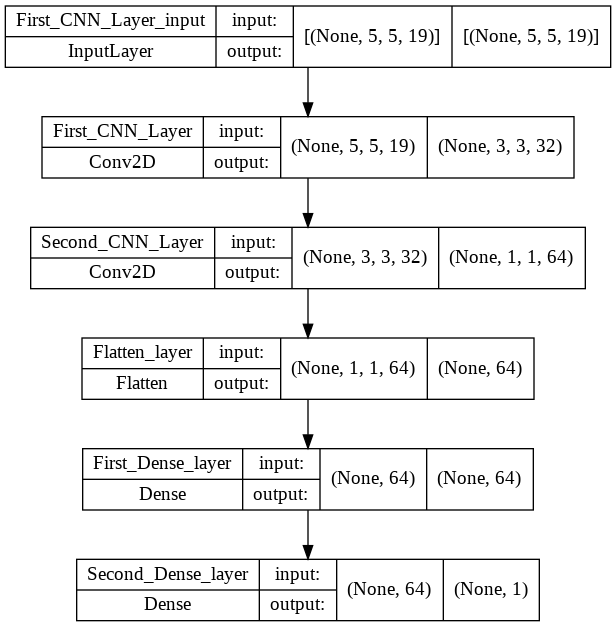

In [ ]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(5, 5, 19), padding='valid', name="First_CNN_Layer"))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid', name="Second_CNN_Layer"))
#model.add(layers.Conv2D(128, (1, 1), activation='relu', padding='valid', name="Third_CNN_Layer"))
model.add(layers.Flatten(name="Flatten_layer")) 
model.add(layers.Dense(64, activation='relu', name="First_Dense_layer"))
model.add(layers.Dense(1, activation='sigmoid', name="Second_Dense_layer"))

model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##DATA TRAIN_TEST_SPLIT

In [ ]:
#División 80% (entrenamiento)-20% (prueba)
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size = 0.2)

In [ ]:
#Estructura de la división
print(f'La forma del input_train es: {inputs_train.shape}')
print(f'La forma del input_test es: {inputs_test.shape}')
print(f'La forma del outputs_train es: {outputs_train.shape}')
print(f'La forma del outputs_test es: {outputs_test.shape}')


La forma del input_train es: (209, 5, 5, 19)
La forma del input_test es: (53, 5, 5, 19)
La forma del outputs_train es: (209, 1)
La forma del outputs_test es: (53, 1)


##COMPILACIÓN DEL MODELO

In [ ]:
#Compilación del modelo
model.compile(
	loss = tf.keras.losses.BinaryCrossentropy( from_logits = True ),
	optimizer = keras.optimizers.Adam(lr = .001),
	metrics = ['accuracy']
	)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
Wsave = model.get_weights()
model.set_weights(Wsave)

In [ ]:
#Reducción del valor de perdida y guardado del mejor modelo de entrenamiento
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, save_weights_only=False, mode='max', verbose=1)

#Entrenamiento
callbacks = [checkpoint, reduce_lr]
hist = model.fit(inputs_train, outputs_train,
                 validation_data = (inputs_test, outputs_test),
                 batch_size = 32,
                 epochs=100, callbacks=callbacks,
                 verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/7 [===>..........................] - ETA: 3s - loss: 0.6672 - accuracy: 0.6250
Epoch 1: val_accuracy improved from -inf to 0.66038, saving model to best_model.h5
7/7 [==============================] - 1s 47ms/step - loss: 0.6486 - accuracy: 0.6603 - val_loss: 0.5991 - val_accuracy: 0.6604 - lr: 0.0010
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6033 - accuracy: 0.7188
Epoch 2: val_accuracy improved from 0.66038 to 0.73585, saving model to best_model.h5
7/7 [==============================] - 0s 16ms/step - loss: 0.5403 - accuracy: 0.7560 - val_loss: 0.4832 - val_accuracy: 0.7358 - lr: 0.0010
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5081 - accuracy: 0.7500
Epoch 3: val_accuracy improved from 0.73585 to 0.96226, saving model to best_model.h5
7/7 [==============================] - 0s 15ms/step - loss: 0.4220 - accuracy: 0.8182 - val_loss: 0.3151 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 4/100
1/7 [===>..........................] - ETA:

##PRECISIÓN Y PÉRDIDA DEL MODELO

##GRÁFICAS

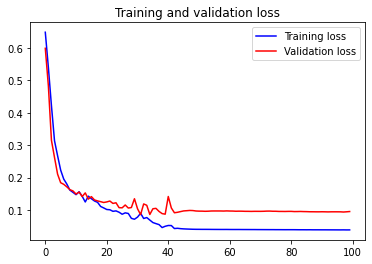

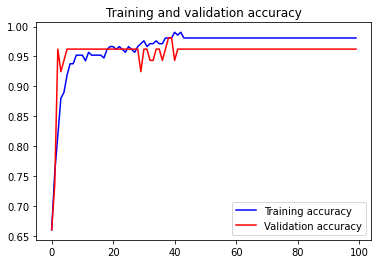

In [ ]:
plt.figure(1)
plt.plot(hist.history['loss'], color='b', label = 'Training loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure(2)
plt.plot(hist.history['accuracy'], color='b', label = 'Training accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

##EVALUACIÓN DEL MODELO

In [ ]:
#Cargado del modelo guardado, predicción del test
model_F = load_model('/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/best_model_0,9811.h5')
predict_test = model_F.predict(inputs_test)
print(predict_test[:5])
print('---------')
print(outputs_test[:5])

[[0.9999994 ]
 [0.97310704]
 [0.9999125 ]
 [0.9563724 ]
 [0.99972457]]
---------
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
#Predicción del test con el modelo entrenado
predict = model.predict(inputs_test)
print(predict[:5])
print('---------')
print(outputs_test[:5])

[[0.99999976]
 [0.9754969 ]
 [0.9999541 ]
 [0.9569875 ]
 [0.99984527]]
---------
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
#Calificación del modelo
score = model_F.evaluate(inputs_test, outputs_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2/2 [==============================] - 0s 8ms/step - loss: 0.0889 - accuracy: 0.9811
Test loss: 0.08893875032663345
Test accuracy: 0.9811320900917053


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


##MATRIZ DE CONFUSIÓN

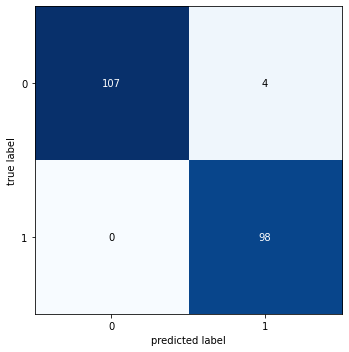

In [ ]:
#Matriz de confusión del entrenamiento
model_F = load_model('/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/best_model_0,9811.h5')
train_predict = model_F.predict(inputs_train)
rounded_train_predict = np.round(train_predict)
matc0=confusion_matrix(outputs_train, rounded_train_predict)
plot_confusion_matrix(conf_mat=matc0, figsize=(5,5), show_normed=False)
plt.tight_layout()

#LABELS: 
#No Deslizamientos = 0, 
#Si Deslizamientos = 1.

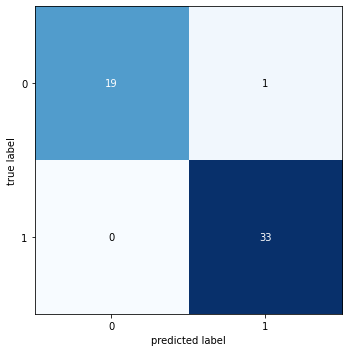

In [ ]:
 #Matriz de confusión de la predicción

model_F = load_model('/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/best_model_0,9811.h5')
test_predict = model_F.predict(inputs_test)

rounded_test_predict = np.round(test_predict)
matc=confusion_matrix(outputs_test, rounded_test_predict)
plot_confusion_matrix(conf_mat=matc, figsize=(5,5), show_normed=False)
plt.tight_layout()

#LABELS: 
#No Deslizamientos = 0, 
#Si Deslizamientos = 1.

In [ ]:
print(metrics.classification_report(outputs_test, rounded_test_predict, digits = 4))

              precision    recall  f1-score   support

         0.0     1.0000    0.9000    0.9474        20
         1.0     0.9429    1.0000    0.9706        33

    accuracy                         0.9623        53
   macro avg     0.9714    0.9500    0.9590        53
weighted avg     0.9644    0.9623    0.9618        53



#PREDICCIÓN

##PRUEBA N°1

In [ ]:
#Clonar carpeta Github
! git clone 'https://github.com/jfcepeda97/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo.git'

Mounted at /content/drive


In [ ]:
#Creación de tensores para almacenamiento de entradas
inputs_aspect= np.empty((43077, 5, 5), dtype='float32')
inputs_cnbl = np.empty((43077, 5, 5), dtype='float32')
inputs_cnd= np.empty((43077, 5, 5), dtype='float32')
inputs_dtf= np.empty((43077, 5, 5), dtype='float32')
inputs_dtr= np.empty((43077, 5, 5), dtype='float32')
inputs_elv= np.empty((43077, 5, 5), dtype='float32')
inputs_g1= np.empty((43077, 5, 5), dtype='float32')
inputs_g3= np.empty((43077, 5, 5), dtype='float32')
inputs_g4= np.empty((43077, 5, 5), dtype='float32')
inputs_g5= np.empty((43077, 5, 5), dtype='float32')
inputs_lsf= np.empty((43077, 5, 5), dtype='float32')
inputs_plc= np.empty((43077, 5, 5), dtype='float32')
inputs_prc= np.empty((43077, 5, 5), dtype='float32')
inputs_rsp= np.empty((43077, 5, 5), dtype='float32')
inputs_slp= np.empty((43077, 5, 5), dtype='float32')
inputs_twi= np.empty((43077, 5, 5), dtype='float32')
inputs_v1= np.empty((43077, 5, 5), dtype='float32')
inputs_v2= np.empty((43077, 5, 5), dtype='float32')
inputs_v3= np.empty((43077, 5, 5), dtype='float32')

In [ ]:
#Enlaces de las carpetas que contienen a las variables de entrada para predicción
aspect= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/Aspect'
cnbl = r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/Channel Network Base Level'
cnd= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/Channet_Network_Distance'
dtf= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/Distance_to_faults'
dtr= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/Distance_to_roads'
elv= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/Elevation'
g1= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/G1'
g3= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/G3'
g4= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/G4'
g5= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/G5'
lsf= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/LS-Factor'
plc= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/Plan_curvature'
prc= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/Profile curvature'
rsp= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/Relative Slope Position'
slp= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/Slope'
twi= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/TWI'
v1= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/V1'
v2= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/V2'
v3= r'/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/PREDICT_DATASET/V3'

In [ ]:
#Enlistado de archivos (imágenes) de cada carpeta de entrada
aspect_name = os.listdir(aspect)
cnbl_name = os.listdir(cnbl)
cnd_name = os.listdir(cnd)
dtf_name = os.listdir(dtf)
dtr_name = os.listdir(dtr)
elv_name = os.listdir(elv)
g1_name = os.listdir(g1)
g3_name = os.listdir(g3)
g4_name = os.listdir(g4)
g5_name = os.listdir(g5)
lsf_name = os.listdir(lsf)
plc_name = os.listdir(plc)
prc_name = os.listdir(prc)
rsp_name = os.listdir(rsp)
slp_name = os.listdir(slp)
twi_name = os.listdir(twi)
v1_name = os.listdir(v1)
v2_name = os.listdir(v2)
v3_name = os.listdir(v3)

In [ ]:
#Organizar archivos (imágenes) de entrada en orden alfabético
aspect_name = sorted(aspect_name)
cnbl_name = sorted(cnbl_name)
cnd_name = sorted(cnd_name)
dtf_name = sorted(dtf_name)
dtr_name = sorted(dtr_name)
elv_name = sorted(elv_name)
g1_name = sorted(g1_name)
g3_name = sorted(g3_name)
g4_name = sorted(g4_name)
g5_name = sorted(g5_name)
lsf_name = sorted(lsf_name)
plc_name = sorted(plc_name)
prc_name = sorted(prc_name)
rsp_name = sorted(rsp_name)
slp_name = sorted(slp_name)
twi_name = sorted(twi_name)
v1_name = sorted(v1_name)
v2_name = sorted(v2_name)
v3_name = sorted(v3_name)

In [ ]:
#Verificación de la organización de archivos
print(aspect_name[0:10])
print(elv_name[0:10])

['Aspect_0.tif', 'Aspect_1.tif', 'Aspect_10.tif', 'Aspect_100.tif', 'Aspect_1000.tif', 'Aspect_10000.tif', 'Aspect_10001.tif', 'Aspect_10002.tif', 'Aspect_10003.tif', 'Aspect_10004.tif']
['Elevation_0.tif', 'Elevation_1.tif', 'Elevation_10.tif', 'Elevation_100.tif', 'Elevation_1000.tif', 'Elevation_10000.tif', 'Elevation_10001.tif', 'Elevation_10002.tif', 'Elevation_10003.tif', 'Elevation_10004.tif']


In [ ]:
#Almacenamiento de imágenes de entrada en los tensores de entrada
l=0
for i in aspect_name:
  var_aspect=os.path.join(aspect,i)
  v_aspect = Image.open(var_aspect)
  va_aspect = np.array(v_aspect)
  inputs_aspect[l] = va_aspect
  l=l+1

l=0
for i in cnbl_name:
  var_cnbl=os.path.join(cnbl,i)
  v_cnbl = Image.open(var_cnbl)
  va_cnbl = np.array(v_cnbl)
  inputs_cnbl[l] = va_cnbl
  l=l+1

l=0
for i in cnd_name:
  var_cnd=os.path.join(cnd,i)
  v_cnd = Image.open(var_cnd)
  va_cnd = np.array(v_cnd)
  inputs_cnd[l] = va_cnd
  l=l+1

l=0
for i in dtf_name:
  var_dtf=os.path.join(dtf,i)
  v_dtf = Image.open(var_dtf)
  va_dtf = np.array(v_dtf)
  inputs_dtf[l] = va_dtf
  l=l+1

l=0
for i in dtr_name:
  var_dtr=os.path.join(dtr,i)
  v_dtr = Image.open(var_dtr)
  va_dtr = np.array(v_dtr)
  inputs_dtr[l] = va_dtr
  l=l+1

l=0
for i in elv_name:
  var_elv=os.path.join(elv,i)
  v_elv = Image.open(var_elv)
  va_elv = np.array(v_elv)
  inputs_elv[l] = va_elv
  l=l+1

l=0
for i in g1_name:
  var_g1=os.path.join(g1,i)
  v_g1 = Image.open(var_g1)
  va_g1 = np.array(v_g1)
  va_g1 = np.clip(va_g1, 0, 1)
  inputs_g1[l] = va_g1
  l=l+1

l=0
for i in g3_name:
  var_g3=os.path.join(g3,i)
  v_g3 = Image.open(var_g3)
  va_g3 = np.array(v_g3)
  va_g3 = np.clip(va_g3, 0, 1)
  inputs_g3[l] = va_g3
  l=l+1

l=0
for i in g4_name:
  var_g4=os.path.join(g4,i)
  v_g4 = Image.open(var_g4)
  va_g4 = np.array(v_g4)
  va_g4 = np.clip(va_g4, 0, 1)
  inputs_g4[l] = va_g4
  l=l+1

l=0
for i in g5_name:
  var_g5=os.path.join(g5,i)
  v_g5 = Image.open(var_g5)
  va_g5 = np.array(v_g5)
  va_g5 = np.clip(va_g5, 0, 1)
  inputs_g5[l] = va_g5
  l=l+1

l=0
for i in lsf_name:
  var_lsf=os.path.join(lsf,i)
  v_lsf = Image.open(var_lsf)
  va_lsf = np.array(v_lsf)
  inputs_lsf[l] = va_lsf
  l=l+1


l=0
for i in plc_name:
  var_plc = os.path.join(plc,i)
  v_plc = Image.open(var_plc)
  va_plc = np.array(v_plc)
  inputs_plc[l] = va_plc
  l=l+1

l=0
for i in prc_name:
  var_prc = os.path.join(prc,i)
  v_prc = Image.open(var_prc)
  va_prc = np.array(v_prc)
  inputs_prc[l] = va_prc
  l=l+1

l=0
for i in rsp_name:
  var_rsp = os.path.join(rsp,i)
  v_rsp = Image.open(var_rsp)
  va_rsp = np.array(v_rsp)
  inputs_rsp[l] = va_rsp
  l=l+1

l=0
for i in slp_name:
  var_slp = os.path.join(slp,i)
  v_slp = Image.open(var_slp)
  va_slp = np.array(v_slp)
  inputs_slp[l] = va_slp
  l=l+1

l=0
for i in twi_name:
  var_twi = os.path.join(twi,i)
  v_twi = Image.open(var_twi)
  va_twi = np.array(v_twi)
  inputs_twi[l] = va_twi
  l=l+1

l=0
for i in v1_name:
  var_v1 = os.path.join(v1,i)
  v_v1 = Image.open(var_v1)
  va_v1 = np.array(v_v1)
  va_v1 = np.clip(va_v1, 0, 1)
  inputs_v1[l] = va_v1
  l=l+1

l=0
for i in v2_name:
  var_v2 = os.path.join(v2,i)
  v_v2 = Image.open(var_v2)
  va_v2 = np.array(v_v2)
  va_v2 = np.clip(va_v2, 0, 1)
  inputs_v2[l] = va_v2
  l=l+1

l=0
for i in v3_name:
  var_v3 = os.path.join(v3,i)
  v_v3 = Image.open(var_v3)
  va_v3 = np.array(v_v3)
  va_v3 = np.clip(va_v3, 0, 1)
  inputs_v3[l] = va_v3
  l=l+1

In [ ]:
#Tensor de almacenamiento para el apilamiento de variables (imágenes)
bag_predict = np.empty((43077,5, 5, 19), dtype='float32')
v=len(inputs_cnbl)

In [ ]:
#Apilamiento de variables (imágenes)
a=0
for a in range(v):
  bag_predict[a] = np.dstack((inputs_aspect[a], inputs_cnbl[a], inputs_cnd[a], inputs_dtf[a], inputs_dtr[a], inputs_elv[a],
                              inputs_g1[a], inputs_g3[a], inputs_g4[a], inputs_g5[a], inputs_lsf[a], inputs_plc[a], 
                              inputs_prc[a], inputs_rsp[a], inputs_slp[a], inputs_twi[a], inputs_v1[a], inputs_v2[a], inputs_v3[a]))

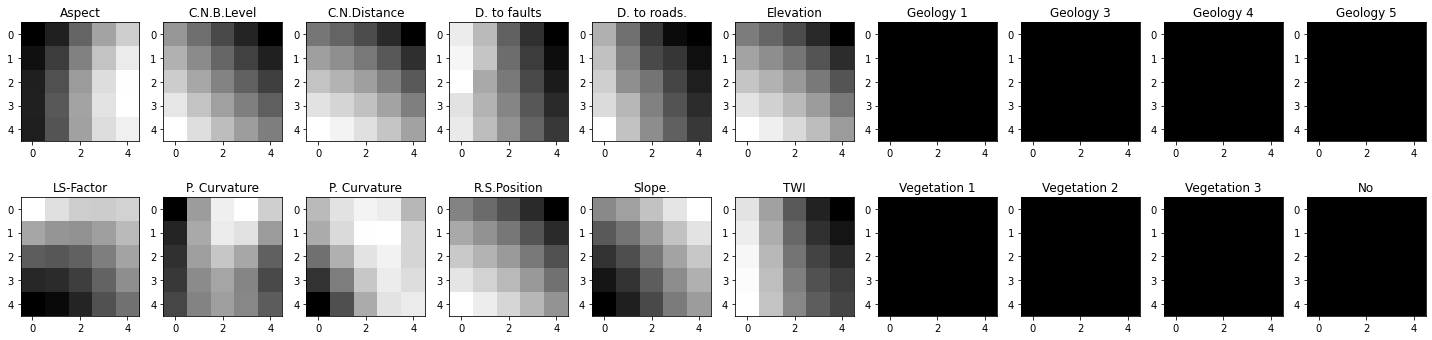

In [ ]:
#Gráficas de verificación

fig, ax = plt.subplots(2,10,figsize=(20,5))

q=0   #Posición dentro de los inputs

ax[0,0].imshow(bag_predict[q,:,:,0], cmap='gray')
ax[0,0].set_title('Aspect')
ax[0,1].imshow(bag_predict[q,:,:,1], cmap='gray')
ax[0,1].set_title('C.N.B.Level')
ax[0,2].imshow(bag_predict[q,:,:,2], cmap='gray')
ax[0,2].set_title('C.N.Distance')
ax[0,3].imshow(bag_predict[q,:,:,3], cmap='gray')
ax[0,3].set_title('D. to faults')
ax[0,4].imshow(bag_predict[q,:,:,4], cmap='gray')
ax[0,4].set_title('D. to roads.')
ax[0,5].imshow(bag_predict[q,:,:,5], cmap='gray')
ax[0,5].set_title('Elevation')
ax[0,6].imshow(bag_predict[q,:,:,6], cmap='gray')
ax[0,6].set_title('Geology 1')
ax[0,7].imshow(bag_predict[q,:,:,7], cmap='gray')
ax[0,7].set_title('Geology 3')
ax[0,8].imshow(bag_predict[q,:,:,8], cmap='gray')
ax[0,8].set_title('Geology 4')
ax[0,9].imshow(bag_predict[q,:,:,9], cmap='gray')
ax[0,9].set_title('Geology 5')
ax[1,0].imshow(bag_predict[q,:,:,10], cmap='gray')
ax[1,0].set_title('LS-Factor')
ax[1,1].imshow(bag_predict[q,:,:,11], cmap='gray')
ax[1,1].set_title('P. Curvature')
ax[1,2].imshow(bag_predict[q,:,:,12], cmap='gray')
ax[1,2].set_title('P. Curvature')
ax[1,3].imshow(bag_predict[q,:,:,13], cmap='gray')
ax[1,3].set_title('R.S.Position')
ax[1,4].imshow(bag_predict[q,:,:,14], cmap='gray')
ax[1,4].set_title('Slope.')
ax[1,5].imshow(bag_predict[q,:,:,15], cmap='gray')
ax[1,5].set_title('TWI')
ax[1,6].imshow(bag_predict[q,:,:,16], cmap='gray')
ax[1,6].set_title('Vegetation 1')
ax[1,7].imshow(bag_predict[q,:,:,17], cmap='gray')
ax[1,7].set_title('Vegetation 2')
ax[1,8].imshow(bag_predict[q,:,:,18], cmap='gray')
ax[1,8].set_title('Vegetation 3')
ax[1,9].imshow(bag_predict[q,:,:,18], cmap='gray')
ax[1,9].set_title('No')
fig.tight_layout()
plt.show()

In [ ]:
#Tensor para almacenamiento de las predicciones
predict_1= np.empty((43077,1), dtype='float32')

In [ ]:
#Predicción con el modelo guardado
predict_h5 = load_model('/content/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/best_model_0,9811.h5')
predict_1 = predict_h5.predict(bag_predict)
print(predict_1[:10])

[[0.99999726]
 [0.99999714]
 [0.999998  ]
 [0.29296553]
 [0.77916485]
 [0.8859144 ]
 [0.8921886 ]
 [0.89815885]
 [0.903118  ]
 [0.9064465 ]]


In [ ]:
#Generación de un diccionario con valores de posición de pixel y predicción
dic1t = {"Numeration": list(aspect_name), "Prediction":list(predict_1)}
df = pd.DataFrame(dic1t)

#Exportar diccionario a Excel 
df.to_excel("Predicciones.xlsx")

In [ ]:
#Verificación de valores exportados a Excel
print(df.Numeration[0:10])
print(df.Prediction[0:10])

0        Aspect_0.tif
1        Aspect_1.tif
2       Aspect_10.tif
3      Aspect_100.tif
4     Aspect_1000.tif
5    Aspect_10000.tif
6    Aspect_10001.tif
7    Aspect_10002.tif
8    Aspect_10003.tif
9    Aspect_10004.tif
Name: Numeration, dtype: object
0    [0.99999726]
1    [0.99999714]
2      [0.999998]
3    [0.29296553]
4    [0.77916485]
5     [0.8859144]
6     [0.8921886]
7    [0.89815885]
8      [0.903118]
9     [0.9064465]
Name: Prediction, dtype: object
